In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [5]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [6]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [7]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [9]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 250, 250, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,541,134 (85.99 MB)

 Trainable params: 22,541,128 (85.99 MB)

 Non-trainable params: 6 (24.00 B)

In [12]:
plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [13]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.4825 - loss: 3.4405 
Epoch 1: val_accuracy improved from None to 0.53061, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 138s 16s/step - accuracy: 0.5297 - loss: 2.4081 - val_accuracy: 0.5306 - val_loss: 0.7031
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.5583 - loss: 0.6747 
Epoch 2: val_accuracy improved from 0.53061 to 0.59184, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 14s/step - accuracy: 0.5904 - loss: 0.6630 - val_accuracy: 0.5918 - val_loss: 0.7937
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6128 - loss: 0.6517 
Epoch 3: val_accuracy improved from 0.59184 to 0.70408, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 105s 13s/step - accuracy: 0.6498 - loss: 0.6237 - val_accuracy: 0.7041 - val_loss: 0.5659
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7041 - loss: 0.5784 
Epoch 4: val_accuracy improved from 0.70408 to 0.73469, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.7244 - loss: 0.5631 - val_accuracy: 0.7347 - val_loss: 0.5238
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7591 - loss: 0.4976 
Epoch 5: val_accuracy improved from 0.73469 to 0.77551, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 91s 12s/step - accuracy: 0.7800 - loss: 0.4787 - val_accuracy: 0.7755 - val_loss: 0.5085
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8028 - loss: 0.4106 
Epoch 6: val_accuracy improved from 0.77551 to 0.82653, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 93s 12s/step - accuracy: 0.8180 - loss: 0.3843 - val_accuracy: 0.8265 - val_loss: 0.4286
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8539 - loss: 0.3145 
Epoch 7: val_accuracy did not improve from 0.82653
8/8 ━━━━━━━━━━━━━━━━━━━━ 127s 15s/step - accuracy: 0.8660 - loss: 0.2959 - val_accuracy: 0.7857 - val_loss: 0.4664
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9051 - loss: 0.2358 
Epoch 8: val_accuracy did not improve from 0.82653
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.9064 - loss: 0.2267 - val_accuracy: 0.7653 - val_loss: 0.4605
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9175 - loss: 0.2065 
Epoch 9: val_accuracy improved from 0.82653 to 0.83673, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 85s 11s/step - accuracy: 0.9305 - loss: 0.1882 - val_accuracy: 0.8367 - val_loss: 0.4080
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9347 - loss: 0.1683 
Epoch 10: val_accuracy improved from 0.83673 to 0.84694, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 12s/step - accuracy: 0.9355 - loss: 0.1593 - val_accuracy: 0.8469 - val_loss: 0.5009
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9160 - loss: 0.1847 
Epoch 11: val_accuracy did not improve from 0.84694
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.9279 - loss: 0.1735 - val_accuracy: 0.8469 - val_loss: 0.3415
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9482 - loss: 0.1399 
Epoch 12: val_accuracy did not improve from 0.84694
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.9494 - loss: 0.1281 - val_accuracy: 0.8061 - val_loss: 0.5032
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9712 - loss: 0.1016 
Epoch 13: val_accuracy did not improve from 0.84694
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.9709 - loss: 0.1023 - val_accuracy: 0.8469 - val_loss: 0.5599
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9644 - loss: 0.1042 
Epoch 14: val_accuracy improved from 0.84694 to 0.877

8/8 ━━━━━━━━━━━━━━━━━━━━ 106s 13s/step - accuracy: 0.9697 - loss: 0.0878 - val_accuracy: 0.8776 - val_loss: 0.3269
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9704 - loss: 0.0871 
Epoch 15: val_accuracy did not improve from 0.87755
8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 13s/step - accuracy: 0.9760 - loss: 0.0734 - val_accuracy: 0.8776 - val_loss: 0.5024
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9751 - loss: 0.0887 
Epoch 16: val_accuracy improved from 0.87755 to 0.88776, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.9785 - loss: 0.0692 - val_accuracy: 0.8878 - val_loss: 0.4165
Epoch 17/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9790 - loss: 0.0620
Epoch 17: val_accuracy improved from 0.88776 to 0.89796, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.9836 - loss: 0.0525 - val_accuracy: 0.8980 - val_loss: 0.3397
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9718 - loss: 0.0613
Epoch 18: val_accuracy improved from 0.89796 to 0.90816, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 98s 13s/step - accuracy: 0.9785 - loss: 0.0512 - val_accuracy: 0.9082 - val_loss: 0.2881
Epoch 19/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9807 - loss: 0.0582 
Epoch 19: val_accuracy did not improve from 0.90816
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 10s/step - accuracy: 0.9810 - loss: 0.0618 - val_accuracy: 0.8980 - val_loss: 0.4259
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9655 - loss: 0.1032 
Epoch 20: val_accuracy improved from 0.90816 to 0.91837, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 12s/step - accuracy: 0.9785 - loss: 0.0707 - val_accuracy: 0.9184 - val_loss: 0.1843


In [14]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

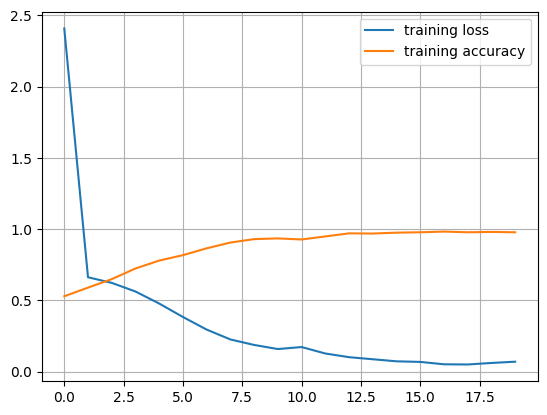

In [15]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

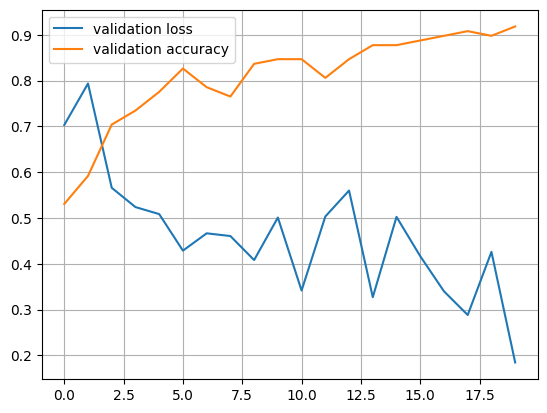

In [16]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step


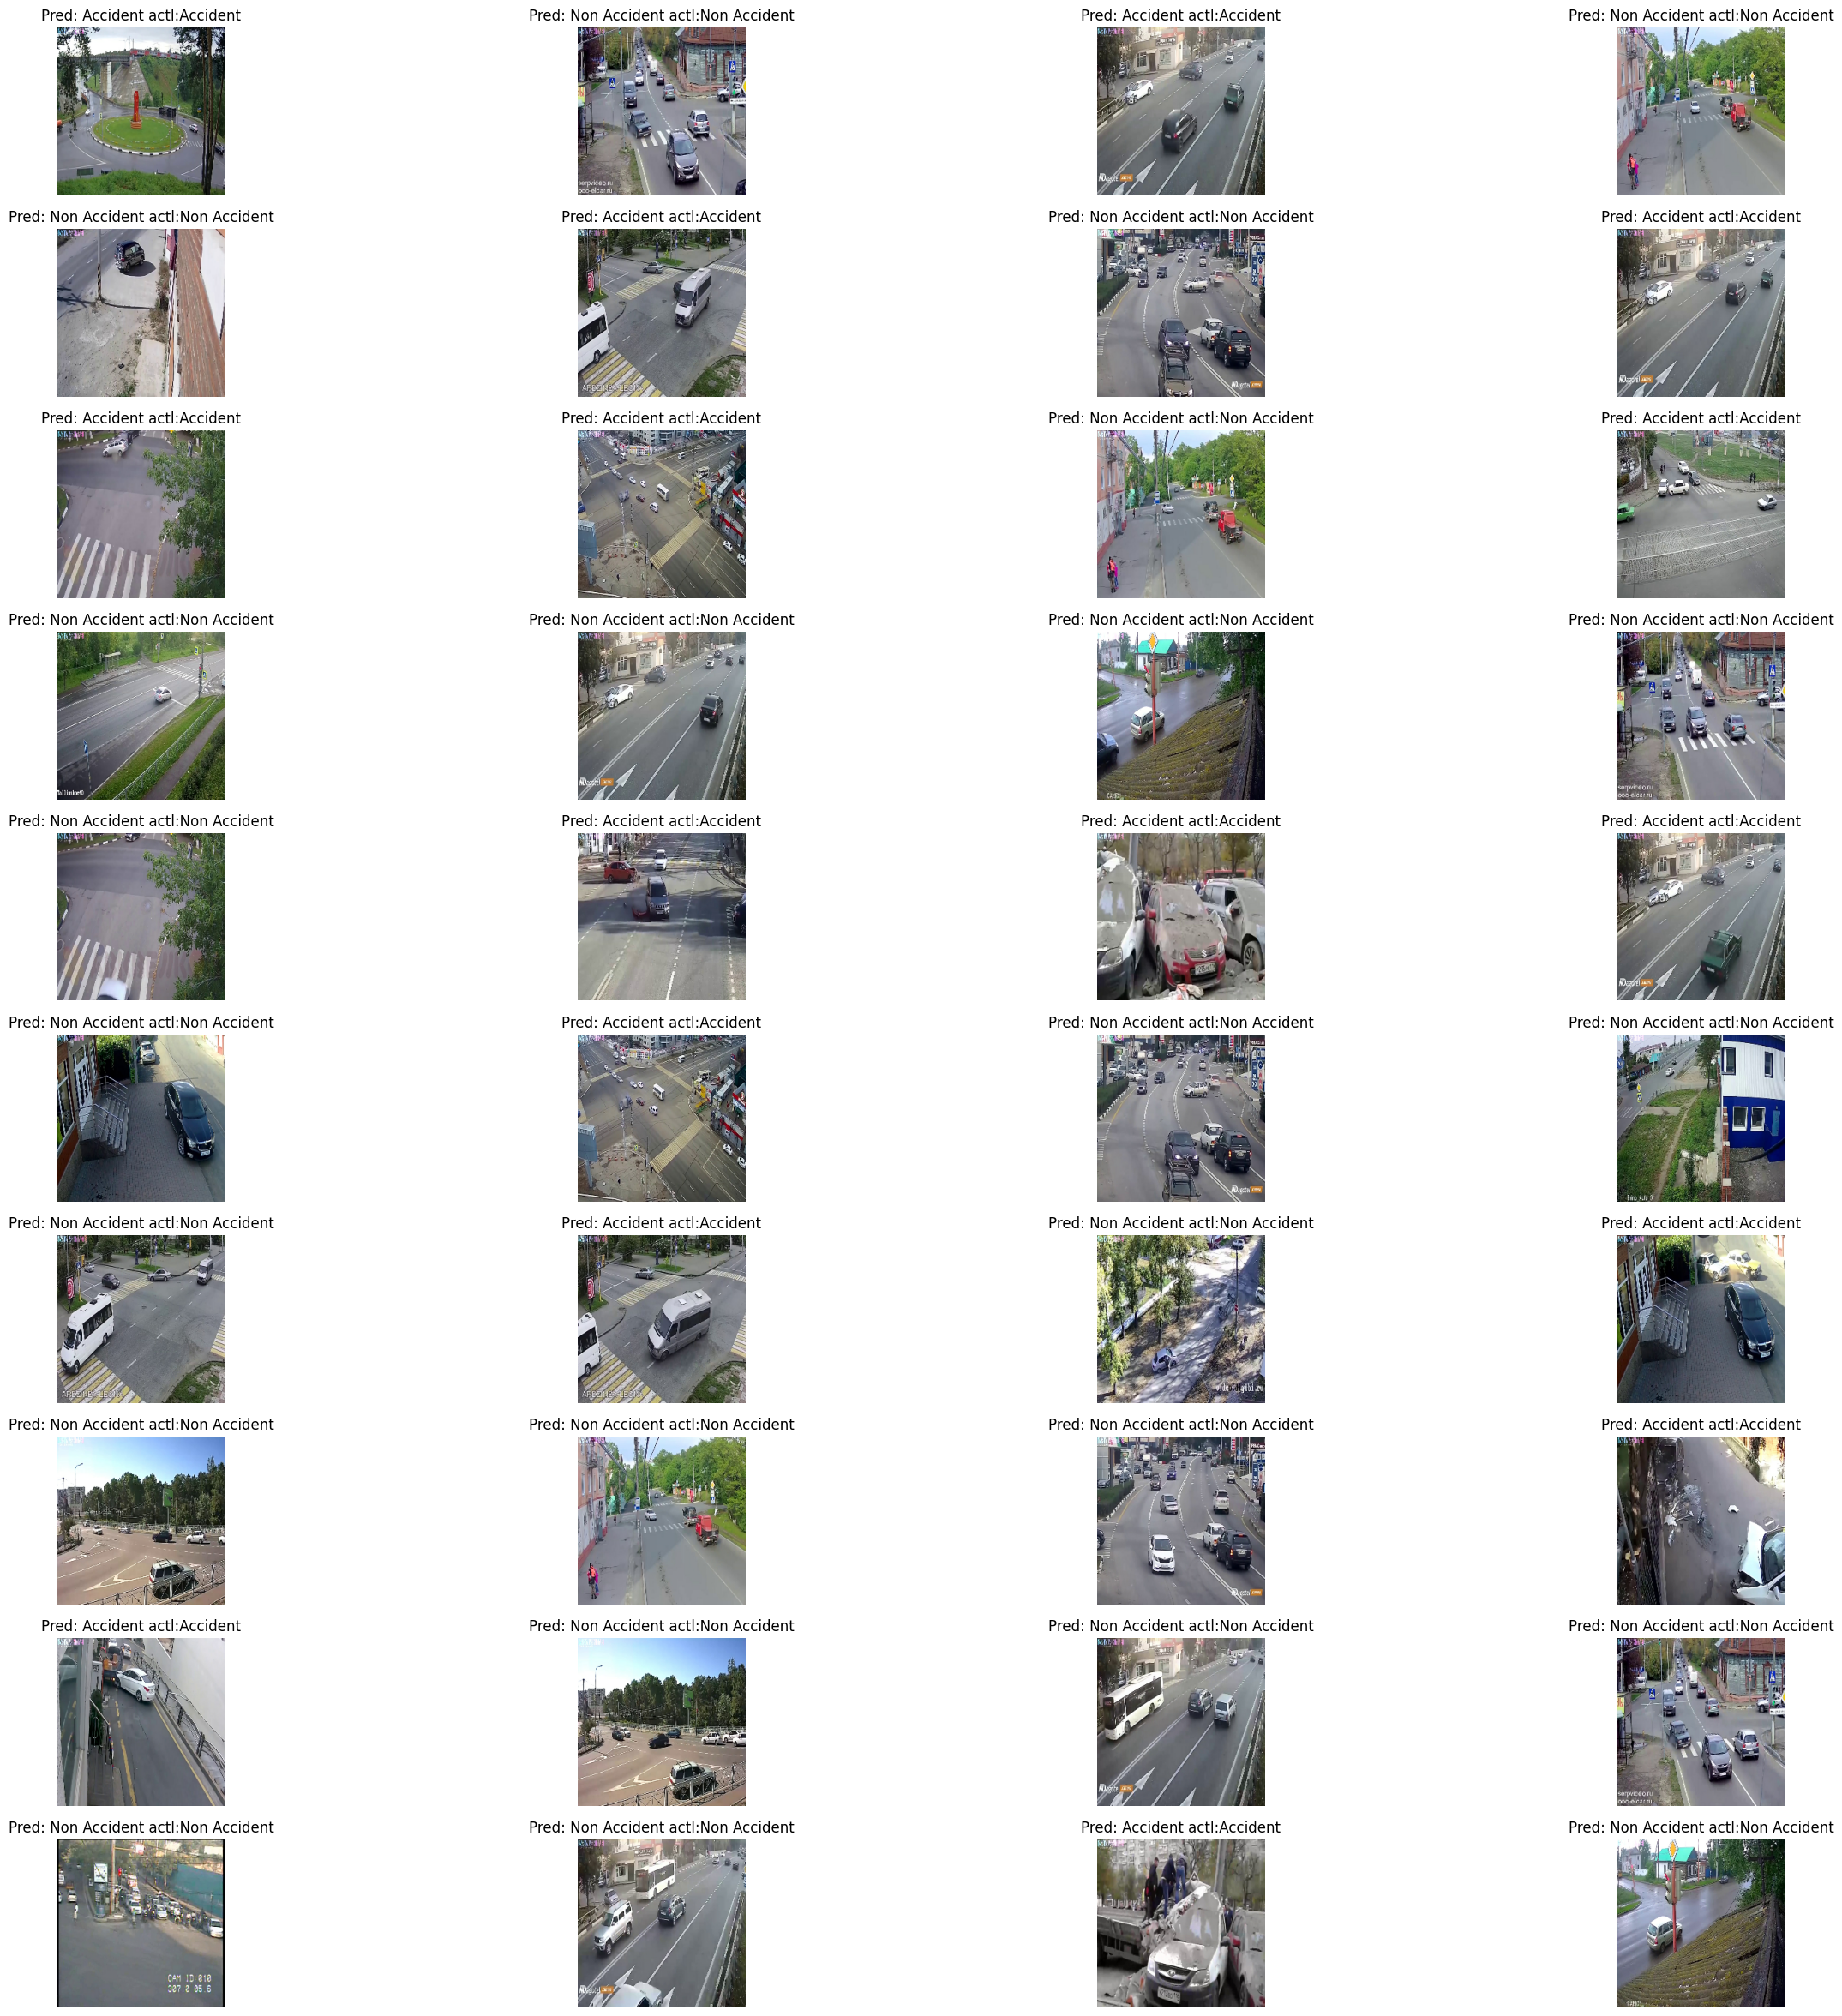

In [17]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)